<a href="https://colab.research.google.com/github/mohdamir1278/Shark-Tank-US-Dashboard/blob/main/analysis_of__Titanic_passenger_train_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df=df.dropna()
df.count()

,0
PassengerId,183
Survived,183
Pclass,183
Name,183
Sex,183
Age,183
SibSp,183
Parch,183
Ticket,183
Fare,183


In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [33]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


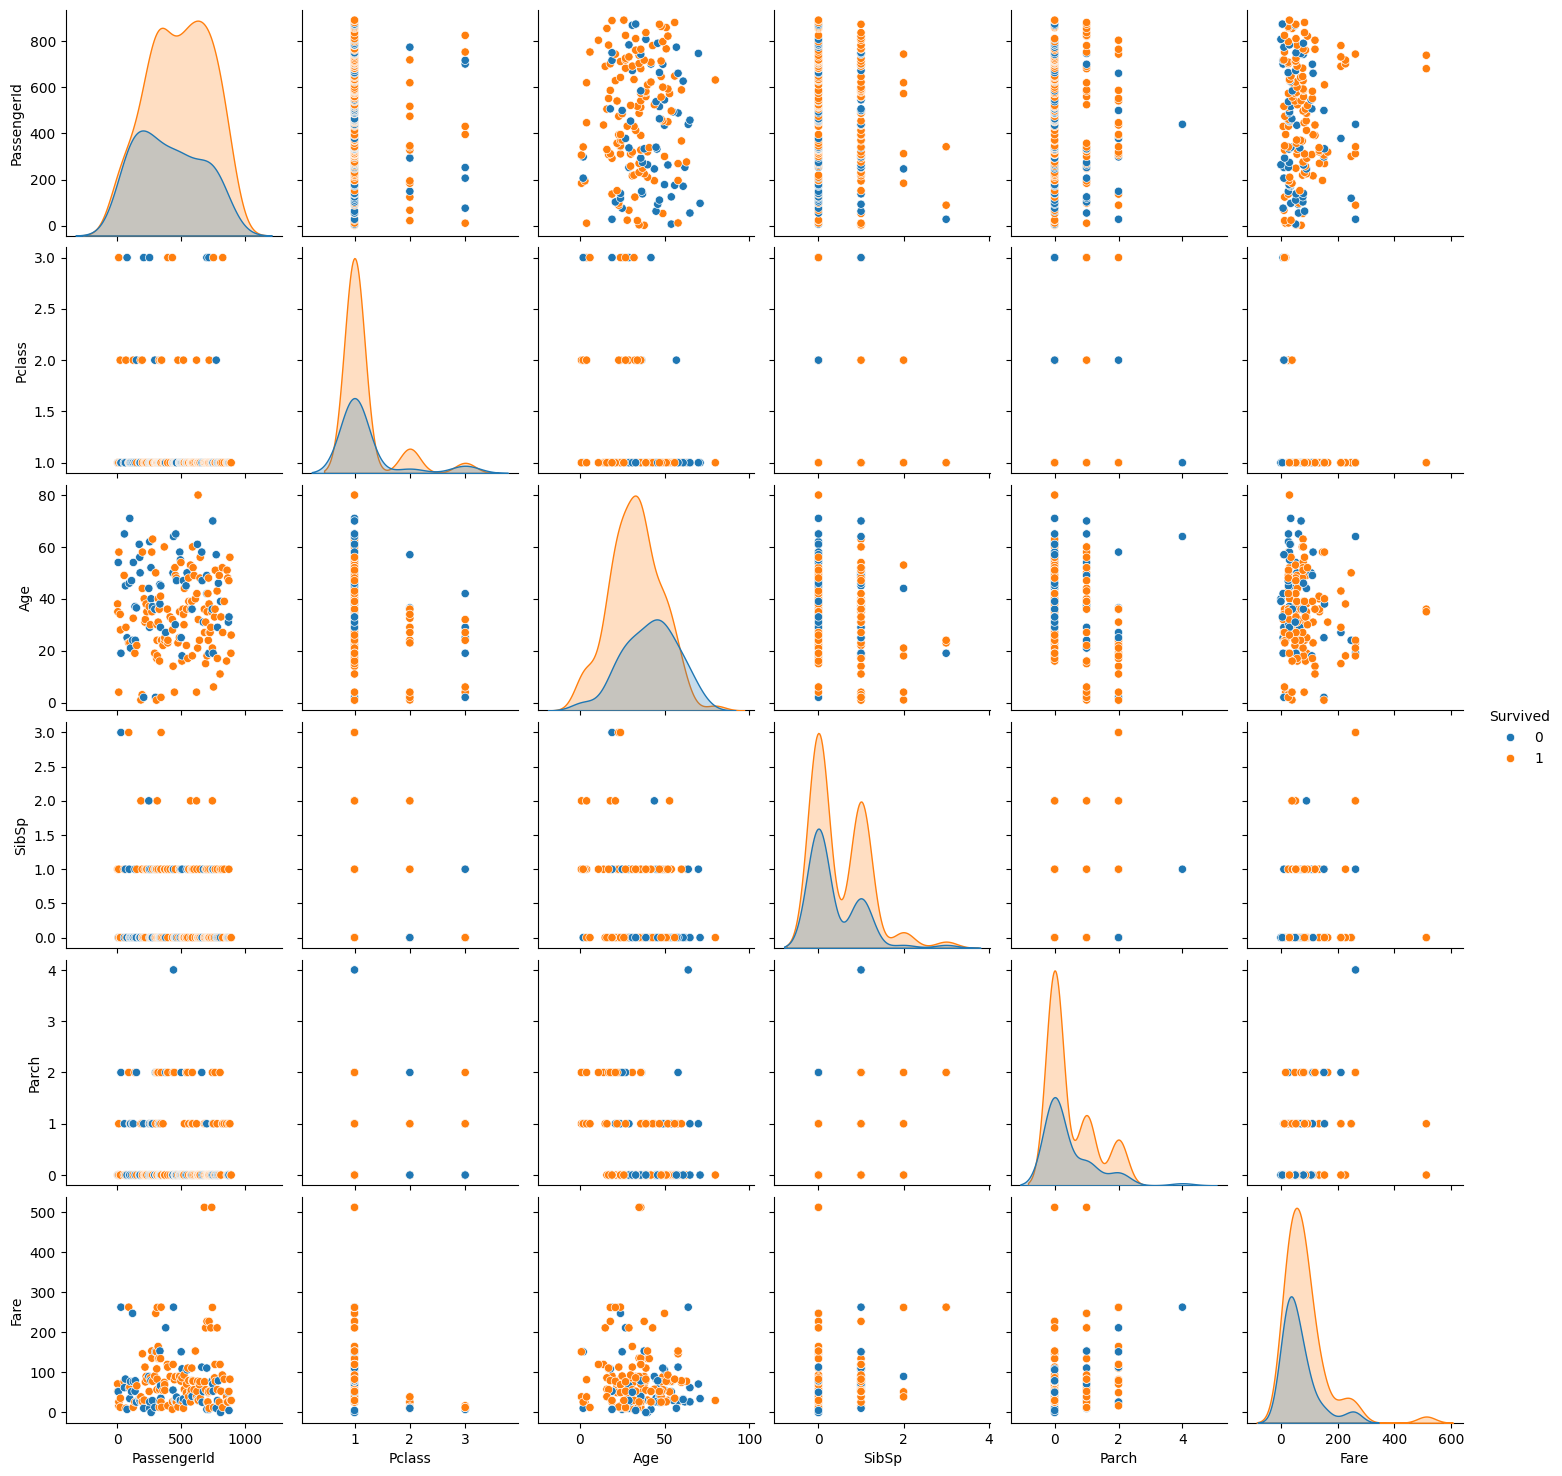

In [12]:
sns.pairplot(df, hue='Survived')


As we see there there are directly relation between of survived with pclass and also with fare:- those who pay higher price as fare show survived rate is high

1st pclass passenger are highly in number

and if we see compare age column with survived passenger we see pattern, is that the age 25 to 40 this age group has highest number of survived passengers.



<Axes: >

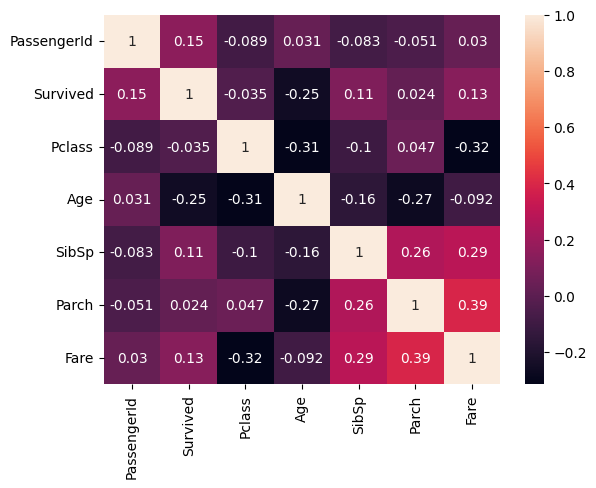

In [13]:
# make heatmap using only float values
df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df.corr(), annot=True)

heatmap show those positive relation between SibSp and Parch which means that those passenger have sibling or spouse have higher no.

In [14]:
# give percentage of survivial in class in 2 decimal
df.groupby('Pclass')['Survived'].mean()*100


,Survived
Pclass,
1,67.088608
2,80.000000
3,50.000000


If we goes with this calculations we see that is 2nd class which have the  highest number to survival rate about 80% survival rate.
now question is what why?

In [15]:
# give number of survived passenger from all pclass
df.groupby('Pclass')['Survived'].sum()

,Survived
Pclass,
1,106
2,12
3,5


the highest survived number passenger in firstclass but if you want where are the highest chance to survived is second class.


In [40]:
# give number of female surviver
point=df[df['Sex']=='female']['Survived'].sum()
print(point)

233


In [41]:
# give number of female surviver
female_survivors = df_original[df_original['Sex']=='female']['Survived'].sum()
print(f"Number of female survivors: {female_survivors}")


# give number of male surviver
male_survivors = df_original[df_original['Sex']=='male']['Survived'].sum()
print(f"Number of male survivors: {male_survivors}")


Number of female survivors: 233
Number of male survivors: 109


<Axes: >

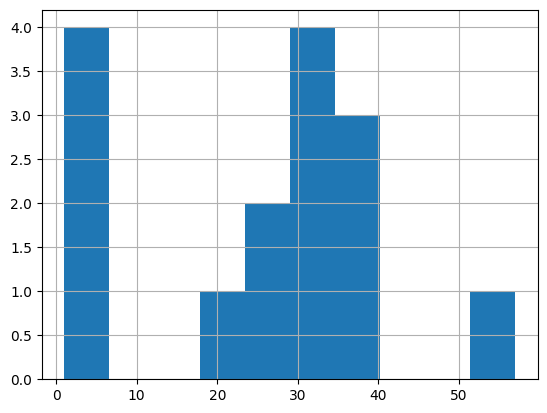

In [25]:
df[df['Pclass'] == 2]['Age'].describe()
df[df['Pclass'] == 2]['Age'].hist()


In this hist graph show that in second class 19-20 years age group mostly survived



Axes(0.125,0.11;0.775x0.77)


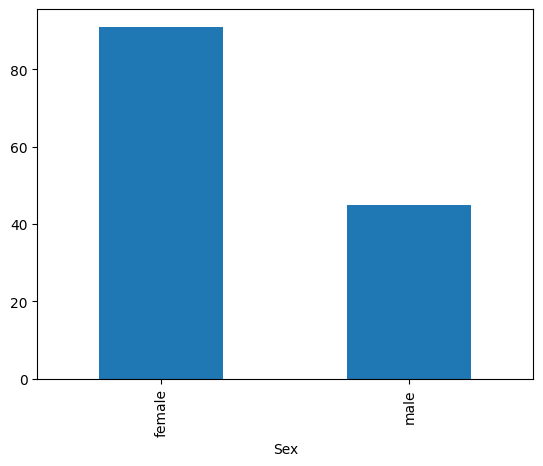

In [45]:

# Filter first-class survivors and group by sex
result = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].groupby('Sex').size().plot(kind='bar')
print(result)


Axes(0.125,0.11;0.775x0.77)


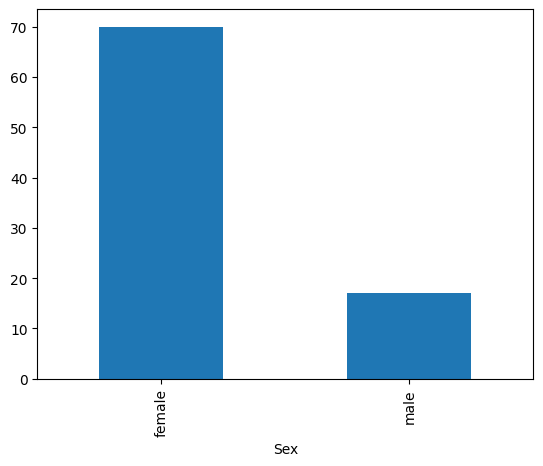

In [44]:

# Filter second-class survivors and group by sex
result = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].groupby('Sex').size().plot(kind='bar')
print(result)


If we compare the survival rate between both classes on the basis of gender, we found that females have a higher rate, and this information does not add any new information regarding the answer to my original question.

<Axes: xlabel='Sex', ylabel='count'>

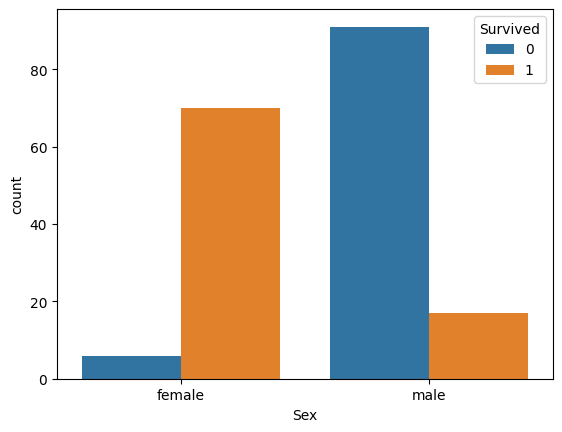

In [36]:
import seaborn as sns
sns.countplot(data=df[df['Pclass'] == 2], x='Sex', hue='Survived')


In [37]:
result=df[df['Pclass'] == 2].groupby('Survived')['Fare'].describe()
print(result)

          count       mean        std   min   25%   50%    75%   max
Survived                                                            
0          97.0  19.412328  15.307175   0.0  11.5  13.0  26.00  73.5
1          87.0  22.055700  10.853502  10.5  13.0  21.0  26.25  65.0


Fare is not gives a proper answer why second class have highest change of survival?

In [39]:
result=df['FamilySize'] = df['SibSp'] + df['Parch']
print(result)
data=df.groupby(['Pclass', 'FamilySize'])['Survived'].mean()*100
print(data)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64
Pclass  FamilySize
1       0              53.211009
        1              72.857143
        2              75.000000
        3              71.428571
        4             100.000000
        5              50.000000
2       0              34.615385
        1              52.941176
        2              67.741935
        3              76.923077
        4             100.000000
        5             100.000000
3       0              21.296296
        1              35.087719
        2              42.553191
        3              66.666667
        4               0.000000
        5               0.000000
        6              33.333333
        7               0.000000
        10              0.000000
Name: Survived, dtype: float64


Now I get my answer why the second class passenger have high change of suvived?
Answer of this lie in the obove result, family size is reposible of this.
in second class passenger who travel with thier families and family size is four or five member have 100% rate of survival.